# Homework Problem Statement : 

`Build a classification model for identifying 9 as a digit and 2 as a digit and rest  as another class using the MNIST dataset.`



---

<p><h2><b><font color = 'Blue'> MNIST Case Study </font></b></h2></p>

The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

<img src = 'https://dim-mlp-images.s3.amazonaws.com/Deep+Learning/MINST/MNIST.png'>

In [ ]:
%tensorflow_version 2.x
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
keras.__version__

'2.12.0'

<p><h3><b><font color = 'DarkBlue'> Loading the MNIST dataset in Keras </font></b></h3></p>

The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy
arrays.

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

<p><b>train_images and train_labels form the training set, the data that the model will learn from. The model will then be tested on the test set, test_images and test_labels.</b></p>

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_labels.shape

(60000,)

<p><h3><font color= 'DarkBlue'><b> Visualizing first four samples in Train dataset </b></font></h3></p>




In [ ]:
import matplotlib.pyplot as plt
train_images[0,:,:].shape

(28, 28)

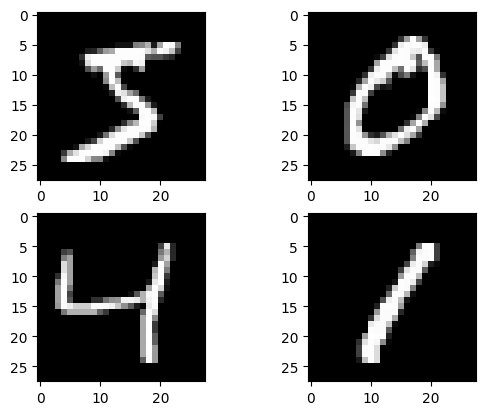

In [ ]:
plt.subplot(2,2,1)
plt.imshow(train_images[0], cmap='gray')
plt.subplot(2,2,2)
plt.imshow(train_images[1], cmap='gray')
plt.subplot(2,2,3)
plt.imshow(train_images[2], cmap='gray')
plt.subplot(2,2,4)
plt.imshow(train_images[3], cmap='gray');

<p><h3><b><font color = 'DarkBlue'> Preparing the image data </font></b></h3></p>

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our training
images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.ndim

3

In [ ]:
#train_images[10:20,10:20,10:20]

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.ndim

2

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
#train_images[:20,100:120]

In [ ]:
#train_images[15000:15100,300:400]

<p><h3><b><font color = 'DarkBlue'> Preparing the labels </font></b></h3></p>

the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix. We use to_categorical() to encode the labels.

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
import numpy as np

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_labels_new = train_labels

In [ ]:
for x in range(len(train_labels_new)):
  if train_labels_new[x] != 2 and train_labels_new[x] !=9:
    train_labels_new[x] = 0

In [ ]:
train_labels_new[train_labels_new == 2] = 1

In [ ]:
train_labels_new[train_labels_new == 9] = 2

In [ ]:
np.unique(train_labels_new)

array([0, 1, 2], dtype=uint8)

In [ ]:
# Test label classes
test_labels_new = test_labels
for x in range(len(test_labels_new)):
  if test_labels_new[x] != 2 and test_labels_new[x] !=9:
    test_labels_new[x] = 0
test_labels_new[test_labels_new == 2] = 1
test_labels_new[test_labels_new == 9] = 2

In [ ]:
np.unique(test_labels_new)

array([0, 1, 2], dtype=uint8)

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels_new)
test_labels = to_categorical(test_labels_new)

In [ ]:
train_labels[:10], train_labels_new[:10]

(array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]], dtype=float32),
 array([0, 0, 0, 0, 2, 1, 0, 0, 0, 0], dtype=uint8))

<p><h3><b><font color = 'DarkBlue'> Network Architecture </font></b></h3></p>

# ***1. Building a Sequential Model ***
  We can create a deep learning sequential model with two layers. 
  





In [ ]:
from keras import models
from keras import layers

In [ ]:
model_A = keras.models.Sequential([
 keras.layers.Dense(units=500, input_shape=(28 * 28,), activation='relu'),
 keras.layers.Dense(units=300, activation='relu'),
 keras.layers.Dense(units=300, activation='relu'),
 keras.layers.Dense(units=200, activation='relu'),
 keras.layers.Dense(units=100, activation='relu'),
 keras.layers.Dense(units=3, activation='softmax'),
 ])

In [ ]:
model_A.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               392500    
                                                                 
 dense_13 (Dense)            (None, 300)               150300    
                                                                 
 dense_14 (Dense)            (None, 300)               90300     
                                                                 
 dense_15 (Dense)            (None, 200)               60200     
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 3)                 303       
                                                                 
Total params: 713,703
Trainable params: 713,703
Non-tr

In [ ]:
model_A.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
train_labels.shape

(60000, 3)

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
test_images.shape

(10000, 784)

In [ ]:
test_labels.shape

(10000, 3)

In [ ]:
model_A.fit(train_images, train_labels,epochs=10,batch_size=512,validation_data=(test_images,test_labels))

Epoch 1/10
118/118 [==============================] - 2s 7ms/step - loss: 0.6521 - accuracy: 0.7936 - val_loss: 0.5663 - val_accuracy: 0.7959
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.4919 - accuracy: 0.8093 - val_loss: 0.4281 - val_accuracy: 0.8342
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.3595 - accuracy: 0.8593 - val_loss: 0.3074 - val_accuracy: 0.8758
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2688 - accuracy: 0.9040 - val_loss: 0.2409 - val_accuracy: 0.9218
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2186 - accuracy: 0.9303 - val_loss: 0.2031 - val_accuracy: 0.9393
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1891 - accuracy: 0.9392 - val_loss: 0.1807 - val_accuracy: 0.9464
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1706 - accuracy: 0.9451 - val_loss: 0.1734 - val_accuracy: 0.9466
Epoch 

In [ ]:
model_A.evaluate(test_images, test_labels)      # Evaluate the model on test dataset 

313/313 [==============================] - 1s 3ms/step - loss: 0.1435 - accuracy: 0.9553


[0.1435461938381195, 0.955299973487854]

In [ ]:
y_pred = np.argmax(model_A.predict(test_images),axis=1) # predict_classes() (deprecated). This line outputs the class with highest estimated probability
y_pred=y_pred.flatten()                           # Convert it to 1D array
y_pred                                            # new predicted labels for image 2 as 1 otherwise 0

313/313 [==============================] - 1s 2ms/step


array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
np.unique(y_pred)

array([0, 1, 2])

In [ ]:
y_pred[1], test_labels[1]

(1, array([0., 1., 0.], dtype=float32))

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

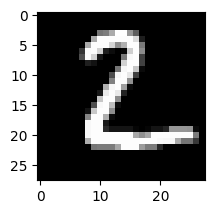

In [ ]:
test_image = test_images[1]
plt.subplot(2,2,1)
plt.imshow(test_image, cmap='gray')

In [ ]:
test_image = test_image.reshape((1, 28 * 28)) 
test_image = test_image.astype('float32') / 255

In [ ]:
single_pred = np.argmax(model_A.predict([test_image]),axis=1)

1/1 [==============================] - 0s 72ms/step


In [ ]:
single_pred[0]

1

In [ ]:
def get_class(test_image, model_A):
  class_map = {0: 'other', 1: 2, 2: 9}
  test_image = test_image.reshape((1, 28 * 28)) 
  test_image = test_image.astype('float32') / 255
  single_pred = np.argmax(model_A.predict([test_image]),axis=1)
  return class_map[single_pred[0]]


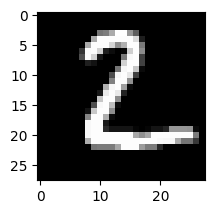

In [ ]:
test_image = test_images[1]
plt.subplot(2,2,1)
plt.imshow(test_image, cmap='gray')

In [ ]:
test_case = get_class(test_image, model_A)

1/1 [==============================] - 0s 18ms/step


In [ ]:
test_case

2

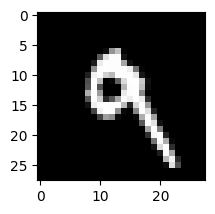

In [ ]:
test_image = test_images[7]
plt.subplot(2,2,1)
plt.imshow(test_image, cmap='gray')

In [ ]:
get_class(test_image, model_A)

1/1 [==============================] - 0s 20ms/step


9

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred, test_labels

(array([0, 1, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0], dtype=uint8))

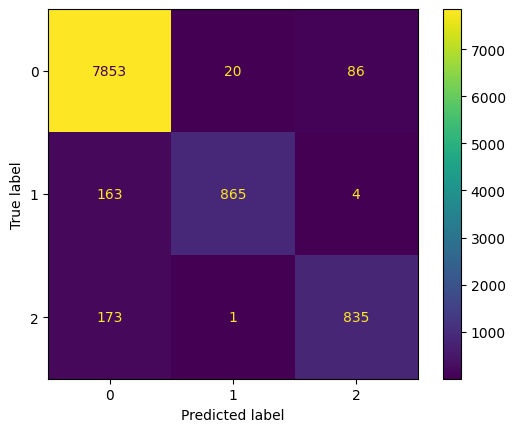

In [ ]:
cm = confusion_matrix(test_labels, y_pred)
ConfusionMatrixDisplay(cm).plot()